In [13]:
import pandas as pd

example_csv = "https://data.ca.gov/dataset/4a9a896a-e64e-48c2-bb35-5589f80e7c52/resource/5a3f496d-04be-4405-aea0-e83e26076efc/download/covid19dashboard.csv"
data = pd.read_csv(example_csv)
data.describe()

,Latitude,Longitude,TotalConfirmed,TotalDeaths,DistinctPatientsTested,NewInTheLast14Days
count,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000
mean,36.375825,-119.569829,1638.599265,5.782594,92.478181,31.482260
std,2.230665,2.217752,1257.548628,7.762456,149.571368,96.678104
min,32.572602,-124.167030,0.000000,0.000000,0.000000,0.000000
25%,34.728857,-121.157830,652.000000,0.000000,6.000000,0.000000
50%,36.177361,-120.278640,1489.000000,2.000000,39.000000,2.000000
75%,37.955474,-117.914730,2488.000000,8.000000,112.000000,16.000000
max,41.782681,-114.619050,5621.000000,30.000000,3158.000000,1457.000000


In [14]:
data.median()


Latitude                    36.177361
Longitude                 -120.278640
TotalConfirmed            1489.000000
TotalDeaths                  2.000000
DistinctPatientsTested      39.000000
NewInTheLast14Days           2.000000
dtype: float64

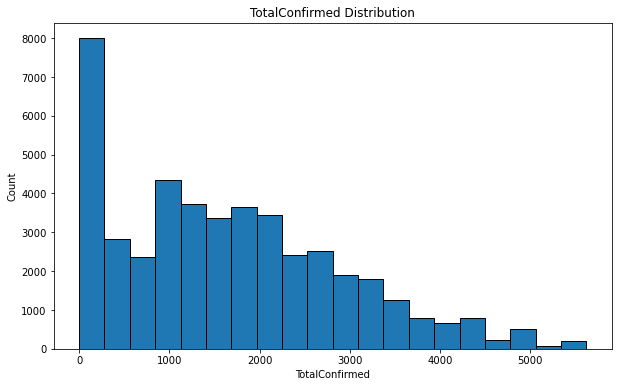

In [15]:
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
general_df = pd.read_csv(example_csv)
plt.figure(figsize=(10, 6))
plt.hist(general_df["TotalConfirmed"], bins=20, edgecolor="black")
plt.title("TotalConfirmed Distribution")
plt.xlabel("TotalConfirmed")
plt.ylabel("Count")
plt.show() 

<ipython-input-16-84c6166cec00>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_df["Date"][i] = datetime.strptime(general_df["Date"][i], '%Y-%m-%d').date()


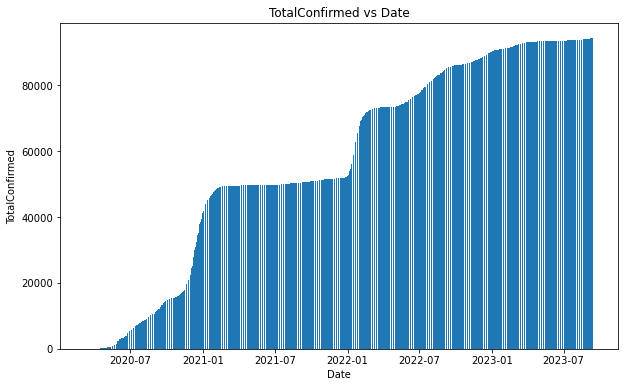

In [16]:
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option("display.max_columns", None)
general_df = pd.read_csv(example_csv)
plt.figure(figsize=(10, 6))
for i in range(44870):
  general_df["Date"][i] = datetime.strptime(general_df["Date"][i], '%Y-%m-%d').date()
#print(type(general_df["Date"][0]))
df = general_df.groupby("Date").sum()
#print(df)
df2 =df.reset_index()
plt.bar(df2["Date"], df2["TotalConfirmed"])
plt.title("TotalConfirmed vs Date")
plt.xlabel("Date")
plt.ylabel("TotalConfirmed")
plt.show() 

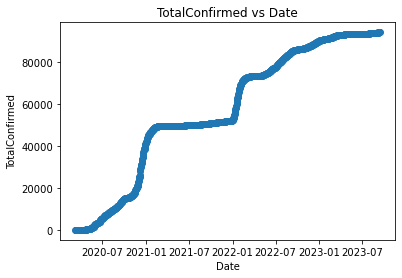

In [17]:
plt.scatter(df2["Date"], df2["TotalConfirmed"])
plt.title("TotalConfirmed vs Date")
plt.xlabel("Date")
plt.ylabel("TotalConfirmed")
plt.show() 

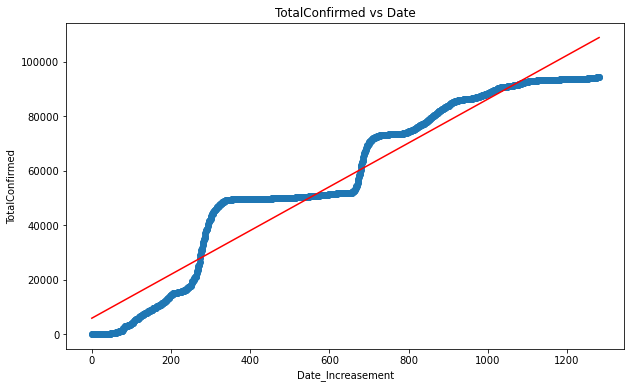

In [19]:
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns", None)
general_df = pd.read_csv(example_csv)
plt.figure(figsize=(10, 6))
df = general_df.groupby("Date").sum()
df2 =df.reset_index()
x = []
a = 0
for i in range(1282):
  x.append(a)
  a = a + 1
df2["date_index"] = x
lr = LinearRegression()  # create object for the class
lr.fit(df2["date_index"].values.reshape(-1, 1), df2["TotalConfirmed"])  # perform linear regression
Y_pred = lr.predict(df2["date_index"].values.reshape(-1, 1))  # make predictions
plt.scatter(df2["date_index"].values.reshape(-1, 1), df2["TotalConfirmed"])
plt.plot(df2["date_index"].values.reshape(-1, 1), Y_pred, color='red')
plt.title("TotalConfirmed vs Date")
plt.xlabel("Date_Increasement")
plt.ylabel("TotalConfirmed")
plt.show()